# Example 2: Boston House-Price Dataset
In this example we will work on the <strong> Boston House-Price Dataset </strong>.<br>
This dataset contains informations of Houses and their prices
### NOTE
To execute a cell, press <strong>Shift+Enter</strong>

## 1. Importing Libraries
We will need 
- numpy (NumPy) for arrays
- pandas (Pandas) for data manipulation
- matplotlib for visualisation
- sklearn (Scikit-Learn) for creating, fitting and evaluating the model
- seaborn (Seaborn), which gives a simpler syntax for visualisation

 

In [23]:
#Every single line comment in python starts with #
import numpy as np
#sklearn.datasets contains some predefined datasets
import sklearn.datasets as ds
#pandas is used for data manipulation
import pandas as pd
#matplotlib.pyplot is used for visualisation
import matplotlib.pyplot as plt
#seaborn is a user friendly library for visualisation built on top of matplotlib
import seaborn as sns
#we will use a Classification Model called LogisticRegression
from sklearn.linear_model import LinearRegression
#we will split the data using train_test_split
from sklearn.model_selection import train_test_split
#OPTIONAL: This is for evaluating a classification model
from sklearn.metrics import confusion_matrix

## 2. Preprocessing: Loading Boston Dataset
We will Load here The Boston Dataset <br>
We will then Load the $X$ values and $y$ values<br>
Remember that:
- $X$ is a matrix where each row describes a particular house, and each column describes a particular feature, $X$ is called the input set
- The correspending $y$ value of the $X$ row defines the price,$y$ is called the output set
- Based on the <strong>information learnt</strong> from $X$ and $y$, and given some <strong>new input data </strong> $X'$ we want to <strong>predict</strong> $y'$

In [24]:
#Load the Boston dataset
boston_dataset=ds.load_boston()
#X is a DataFrame (Matrix/2D array) containing the features of the iris data 
X=pd.DataFrame(boston_dataset["data"])
#y contains the numeric value/label of each iris flower, respecting the order 
#y is a vector (Series/1D array)
y=pd.Series(boston_dataset["target"],name ="Price")
#Feature Names and removing ' (cm)'
feature_names = boston_dataset["feature_names"]
X.columns=feature_names

### Viewing a sample of $X$
Complete the code below:

In [25]:
X.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
189,0.08370,45.0,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.90,5.39
70,0.08826,0.0,10.81,0.0,0.413,6.417,6.6,5.2873,4.0,305.0,19.2,383.73,6.72


### Viewing the first elements of $y$
Feel free to change the number below

In [26]:
y.head(4)

0    24.0
1    21.6
2    34.7
3    33.4
Name: Price, dtype: float64

## 3. Analysing Data
### Merging Tables
To Analyse data, sometimes, it maybe simpler to combine the data to one table.<br>
Complete the code below:

In [27]:
#This line combines The Input Data & The (Numerical) Ouput Data into a new Table (DataFrame)
U=pd.concat([X,y],axis=1)
#To see the last 10 examples
U.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


### Some Plottings

Text(0.5, 1.0, 'Relation Between LSTAT  & Price')

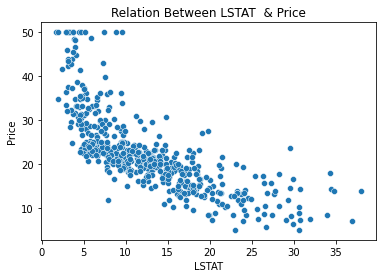

In [28]:
ax=sns.scatterplot(x="LSTAT",y="Price",data=U)
ax.set_title("Relation Between LSTAT  & Price")

## 4. Model Selection
### Creating Train & Test Sets
We will Create a training set that is used to fit our model<br>
The training data is a random sample of size $75\%$ of the boston dataset

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.75)

### Creating & Fitting Model
Here we will create a LinearRegression model and we will fit it against the <strong>training data</strong><br>
Complete the code below

In [30]:
#Creating LinearRegression
model = LinearRegression()
#Fitting Model
model.fit(X_train,y_train);

## 5. Testing Model
We will evaluate the accuarcy of our model with the <strong>testing data</strong><br>
Complete the code below

In [31]:
#R² Score
r2_score =model.score(X_test,y_test)
print("Our model has an R² Score of {:.3f}%".format(100*r2_score))

Our model has an R² Score of 76.409%


## 5. Model Deployment
Now our model is ready for use 😃<br>
We will now save it with Pickle
### a. Saving Model

In [32]:
from joblib import dump, load
dump(model, "boston_model.joblib") 

['boston_model.joblib']

### b. Loading the Saved Model

In [33]:
model2 = load("boston_model.joblib")